In [15]:
import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
from IPython.display import display 


# Pretty display for notebooks
%matplotlib inline
pd.set_option('display.max_colwidth', -1)

dataset = pd.read_csv("datasets/dataset_encoded.csv")
dataset = dataset.drop(['Unnamed: 0'], axis = 1)
display(dataset.head(n = 5))

labels = dataset[['RIESGO_VIDA']]
features = dataset.drop(['RIESGO_VIDA'], axis = 1)

,AFEC_EDADR,AFEC_EDUC,AFEC_GENERO,AFEC_GETNICO,AFEC_PARENTESCO,AFEC_POBESPECIAL,AFEC_REGAFILIACION,AFEC_TIPOPER,ALTO_COSTO,CIE_10,...,PQR_CLASE_SNS,PQR_ESTADO,PQR_TIPOATENCION,PQR_TIPOPETICION,TRIM,AFEC_LOCATION,ENT_LOCATION,PET_LOCATION,COMPLETE_MOTIVE,RIESGO_VIDA
0,0.862194,0.530003,0.865504,0.445166,0.478849,0.304503,1.000000,1.0,0.0,0.086716,...,1.0,0.091348,0.512068,0.658277,0.150914,0.230700,0.280929,0.278713,0.328084,0
1,0.909893,0.530003,1.000000,0.445166,0.478849,0.304503,1.000000,1.0,0.0,0.125322,...,1.0,0.091348,1.000000,0.658277,0.150914,0.221327,0.213105,0.174609,0.209656,0
2,0.862194,0.640631,1.000000,0.445166,0.565950,0.304503,0.661319,1.0,0.0,0.469485,...,1.0,0.091348,1.000000,0.658277,0.150914,0.303620,0.343342,0.307024,0.298898,0
3,0.862194,1.000000,1.000000,0.445166,0.549692,0.304503,0.661319,1.0,0.0,0.023123,...,1.0,0.091348,1.000000,0.658277,0.150914,0.420555,0.531137,0.399282,0.143884,0
4,0.862194,0.530003,1.000000,0.445166,0.549692,0.591697,0.661319,1.0,0.0,0.844386,...,1.0,1.000000,1.000000,0.658277,0.150914,0.287032,0.346242,0.261890,0.361776,1


## Dimensionality reduction

The dataset have 32 features, we explore how this features are correlated

## Shuffle and Split Data

In [16]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'labels' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    labels, 
                                                    test_size = 0.20, 
                                                    random_state = 10)

# Show the results of the split
print "features_final set has {} samples.".format(features.shape[0])
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

features_final set has 2130783 samples.
Training set has 1704626 samples.
Testing set has 426157 samples.


### Creating a Training and Predicting Pipeline

In [17]:
'''
TP = np.sum(income) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data 
encoded to numerical values done in the data preprocessing step.
FP = income.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case
'''

tp = float(np.sum(labels['RIESGO_VIDA']))
fp = float(labels['RIESGO_VIDA'].count() - tp)
tn = 0
fn = 0

# TODO: Calculate accuracy, precision and recall
accuracy = (tp + tn)/labels['RIESGO_VIDA'].count()
recall = tp / (tp + fn)
precision = tp / (tp + fp)
print(accuracy)
# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
# HINT: The formula above can be written as (1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall)
beta = 2
fscore = (1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall)

# Print the results 
print "Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore)

0.135542192706
Naive Predictor: [Accuracy score: 0.1355, F-score: 0.4395]


In [18]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] =  accuracy_score(y_test, predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    b=0.5
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, b)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] =  fbeta_score(y_test, predictions_test, b)
       
    # Success
    print "{} trained on {} samples.".format(learner.__class__.__name__, sample_size)
        
    # Return the results
    return results
  

AdaBoostClassifier trained on 17046 samples.
AdaBoostClassifier trained on 170462 samples.
AdaBoostClassifier trained on 1704626 samples.


/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestClassifier trained on 17046 samples.
RandomForestClassifier trained on 170462 samples.
RandomForestClassifier trained on 1704626 samples.
SGDClassifier trained on 17046 samples.
SGDClassifier trained on 170462 samples.
SGDClassifier trained on 1704626 samples.


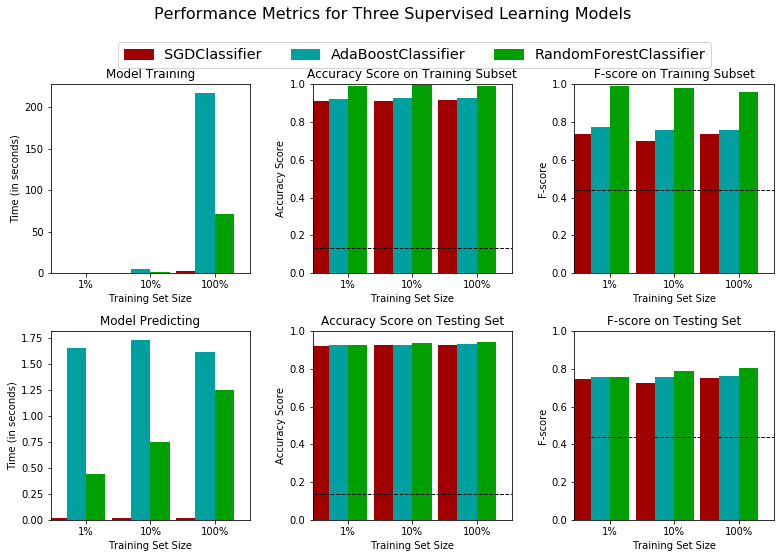

In [19]:
import visuals as vs
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

# TODO: Initialize the three models
clf_A = AdaBoostClassifier(random_state = 300)
clf_B = RandomForestClassifier(random_state = 300)
clf_C = SGDClassifier(random_state = 300)

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100
# HINT: samples_1 is 1% of samples_100
samples_100 = len(y_train)
samples_10 = int(samples_100*0.1)
samples_1 = int(samples_10*0.1)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

In [27]:
print(results)

{'SGDClassifier': {0: {'pred_time': 0.012932062149047852, 'f_test': 0.7480755906109703, 'train_time': 0.012188196182250977, 'acc_train': 0.9133333333333333, 'acc_test': 0.9224182636915503, 'f_train': 0.7371794871794872}, 1: {'pred_time': 0.015194892883300781, 'f_test': 0.724839964767975, 'train_time': 0.2087240219116211, 'acc_train': 0.9133333333333333, 'acc_test': 0.9251003738058978, 'f_train': 0.6991525423728814}, 2: {'pred_time': 0.014487981796264648, 'f_test': 0.7486333061474979, 'train_time': 2.720414876937866, 'acc_train': 0.92, 'acc_test': 0.926818050624535, 'f_train': 0.7352941176470588}}, 'AdaBoostClassifier': {0: {'pred_time': 1.6549580097198486, 'f_test': 0.7542389928672606, 'train_time': 0.5917232036590576, 'acc_train': 0.9233333333333333, 'acc_test': 0.9270222007382256, 'f_train': 0.7738095238095237}, 1: {'pred_time': 1.732532024383545, 'f_test': 0.756092011087667, 'train_time': 5.078078985214233, 'acc_train': 0.9266666666666666, 'acc_test': 0.9278176822157093, 'f_train': 

In [26]:
best_model = clf_B.fit(X_train, y_train)
best_model_predictions = clf_B.predict(X_test)
fbeta_score(y_test, best_model_predictions, beta = 2)
print "Best model's F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_model_predictions, beta = 2))



Best model's F-score on the testing data: 0.7241


In [21]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# TODO: Initialize the classifier
clf = RandomForestClassifier()
clf.random_state = 20
# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {    
    'n_estimators':[50, 100, 170],
    #'learning_rate':[0.1, 1],
    #'subsample':[1.0, 0.5],
    #'max_features':[None, 2]
    #'min_samples_split':[10]
    
}
# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=2)
# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, param_grid=parameters,  scoring=scorer)
# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
c, r = y_train.shape
y_train = y_train.values.reshape(c,)
grid_fit = grid_obj.fit(X_train, y_train)
# Get the estimator
best_clf = grid_fit.best_estimator_
# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)
# Report the before-and-afterscores
print "Unoptimized model\n------"
print "Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 2))
print "\nOptimized Model\n------"
print "Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 2))

Unoptimized model
------
Accuracy score on testing data: 0.9404
F-score on testing data: 0.7242

Optimized Model
------
Final accuracy score on the testing data: 0.9450
Final F-score on the testing data: 0.7556


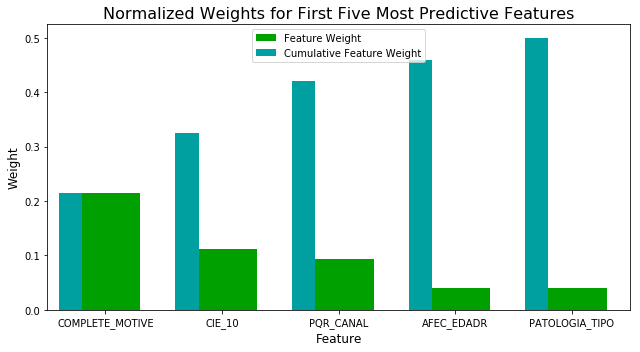

In [22]:
# TODO: Import a supervised learning model that has 'feature_importances_'
from sklearn.ensemble import RandomForestClassifier
clf2 =RandomForestClassifier()

# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
model = clf2.fit(X_train, y_train)

# TODO: Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

In [25]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(clf2)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print "Final Model trained on full data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 2))
print "\nFinal Model trained on reduced data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 2))

Final Model trained on full data
------
Accuracy on testing data: 0.9450
F-score on testing data: 0.7556

Final Model trained on reduced data
------
Accuracy on testing data: 0.9264
F-score on testing data: 0.6694
